<a href="https://colab.research.google.com/github/kuklysdomantas/Neural-Networks-For-Letter-Classification/blob/main/Projektas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(32, 32, 3)
['u', 's', 'p', 'e', 'r', 'i', 'o', 'r', 'c', 'a', 'e', 'r', 'e', 'd', 'c', 'o', 'a', 't', 'g', 'r', 'a', 'i', 'n', 'f', 'r', 'e', 'e', 'n', 'r', 'c', 'e', 'i', 'k', 'i', 'w', 'w', 'w', 'g', 'i', 'n', 't', 'a', 'r', 'i', 'n', 'e', 'l', 't', 'g', 'i', 'n', 't', 'a', 'r', 'i', 'n', 'e', 'v', 'a', 'i', 's', 't', 'i', 'n', 'e', 'i', 'n', 'm', 'e', 'd', 'i', 'c', 'a', 'k', 'l', 'i', 'n', 'i', 'k', 'a', 'r', 'i', 'm', 'i', 'n', 'o', 'r', 'i', 'n', 'a', 'u', 'j', 'a', 'u', 's', 'i', 'o', 'r', 'a', 'g', 'e', 'l', 'i', 'o', 'p', 'r', 'a', 'd', 'e', 'k', 'd', 'i', 'r', 'b', 't', 'i', 'a', 't', 'e', 'k', 'i', 'r', 'i', 'm', 'i', 'i', 'r', 'u', 'z', 's', 'i', 'd', 'i', 'r', 'b', 'k', 's', 'e', 'n', 'o', 'j', 'i', 'p', 'l', 'y', 't', 'i', 'n', 'e', 'i', 'k', 'i', 'j', 'b', 's', 'p', 'i', 'g', 'i', 'a', 'u', 'g', 'r', 'i', 'k', 'i', 'u', 'g', 'r', 'i', 'k', 'i', 'a', 'i', 'j', 'c', 'd', 'e', 'c', 'a', 'u', 'x', 's', 'u', 'g', 'b', 'g', 'p', 'o', 'k', 'a', 'l', 'b', 'i', 'u', 'p', 'l', 'a

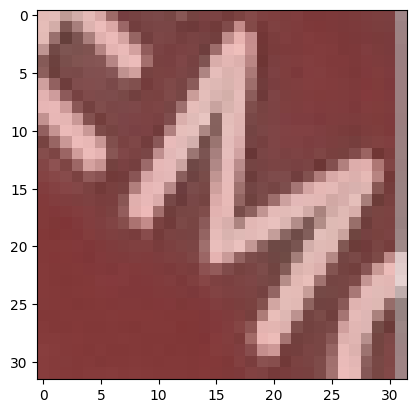

In [8]:
import pandas as pd
import cv2
import imageio.v3 as iio
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/Colab Notebooks/Projektas/Raides/"

#Reading all the images
images = []
for i in range(333):
    image = cv2.imread(f"{path}{i+1}.jpg")
    image = cv2.resize(image, dsize=(32, 32))
    image = image / 255.0
    images.append(image)

plt.imshow(images[-1])
print(images[-1].shape)

with open(f"{path}Labels.csv", "r", encoding="utf-8-sig") as f:
     labels = [line.strip() for line in f if line.strip() != '']
print(labels)

with open(f"{path}Binary.csv", "r", encoding="utf-8-sig") as f:
     y_binary = [line.strip() for line in f if line.strip() != '']
print(y_binary)

In [9]:
#Finding all the unique characters

unique_characters = set(labels)

unique_characters.discard('\ufeff')
unique_characters.discard('\r')
unique_characters.discard('\n')

print(unique_characters)

letter_to_index = {character: idx for idx, character in enumerate(unique_characters)}

import numpy as np

#Using one-hot encoding

y = np.zeros((len(labels), len(unique_characters)))
for text_idx, letter in enumerate(labels):
    character_index = letter_to_index[letter]

    y[text_idx, character_index] = 1.0

print(labels[0])
print(letter_to_index)
print(y[0])

{'d', 'm', 'b', 't', 'v', 'w', 'c', 'g', 'r', 'h', 'o', 'a', 'u', 'y', 'p', 'l', 'z', 's', 'i', 'f', 'k', 'x', 'e', 'j', 'n'}
u
{'d': 0, 'm': 1, 'b': 2, 't': 3, 'v': 4, 'w': 5, 'c': 6, 'g': 7, 'r': 8, 'h': 9, 'o': 10, 'a': 11, 'u': 12, 'y': 13, 'p': 14, 'l': 15, 'z': 16, 's': 17, 'i': 18, 'f': 19, 'k': 20, 'x': 21, 'e': 22, 'j': 23, 'n': 24}
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [10]:
#Printing either the quantity of the letters or the frequency

for unique_character in unique_characters:
    count = labels.count(unique_character)

    print(f"'{unique_character}': {count}")
    #print(f"'{unique_character}': {count / len(labels):.4f}")

'd': 11
'm': 11
'b': 8
't': 16
'v': 5
'w': 3
'c': 9
'g': 12
'r': 26
'h': 2
'o': 16
'a': 34
'u': 15
'y': 3
'p': 10
'l': 9
'z': 1
's': 12
'i': 56
'f': 1
'k': 12
'x': 3
'e': 30
'j': 6
'n': 22


(333, 1)
[1.]


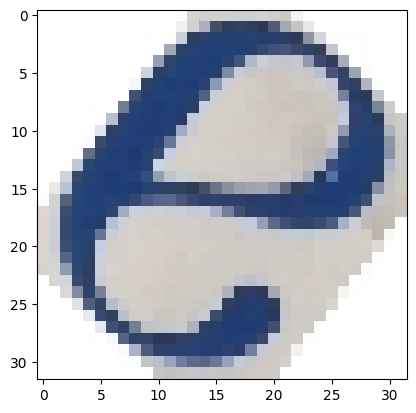

In [13]:
from sklearn.model_selection import train_test_split

images = np.array(images)
y_binary = np.array(y_binary, dtype = np.float32)
y_binary = y_binary.reshape(-1, 1)
print(y_binary.shape)

#Splitting the data to test and training datasets

X_train, X_test, y_train_binary, y_test_binary = train_test_split(images, y_binary, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=42)

plt.imshow(X_train[5])
print(y_train_binary[5])

#print(images.shape)
#print(X_train.shape)
#print(X_test.shape)

In [14]:
import tensorflow as tf

#Building a model for neural network

inputs = tf.keras.layers.Input((32, 32, 3))

x = tf.keras.layers.RandomContrast(0.05)(inputs)
x = tf.keras.layers.RandomZoom(0.1)(x)
x = tf.keras.layers.RandomRotation(0.2)(x)

x = tf.keras.layers.Conv2D(32, 9, padding="same", activation="tanh")(x)
x = tf.keras.layers.MaxPool2D(strides=2, padding="same")(x)

outputs = tf.keras.layers.Dense(32, activation="tanh")(x)

x = tf.keras.layers.Conv2D(64, 3, padding="same", activation="tanh")(x)
x = tf.keras.layers.MaxPool2D(strides=2, padding="same")(x)

outputs = tf.keras.layers.Dense(64, activation="tanh")(x)

x = tf.keras.layers.Conv2D(128, 3, padding="same", activation="tanh")(x)
x = tf.keras.layers.MaxPool2D(strides=2, padding="same")(x)

outputs = tf.keras.layers.Dense(128, activation="tanh")(x)

x = tf.keras.layers.Flatten()(x)

output_augmentation = tf.keras.layers.Dense(1, activation="sigmoid", name="augmentation")(x)

output_classification = tf.keras.layers.Dense(25, activation="softmax", name="classification")(x)

model = tf.keras.models.Model(inputs = inputs, outputs = [output_augmentation, output_classification])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_contrast           │ (None, 32, 32, 3)      │              0 │ input_layer[0][0]      │
│ (RandomContrast)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_zoom (RandomZoom)  │ (None, 32, 32, 3)      │              0 │ random_contrast[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_rotation           │ (None, 32, 32, 3)      │              0 │ random_zoom[0][0]      │
│ (RandomRotation)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 32)     │          7,808 │ random_rotation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 16, 16, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 16, 16, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 8, 8, 64)       │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 8, 8, 128)      │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 4, 4, 128)      │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 2048)           │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ augmentation (Dense)      │ (None, 1)              │          2,049 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification (Dense)    │ (None, 25)             │         51,225 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 153,434 (599.35 KB)

 Trainable params: 153,434 (599.35 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=["binary_crossentropy", "categorical_crossentropy"],
    metrics=[["accuracy"], ["accuracy"]]
    )

#Training the model
model.fit(X_train, [y_train_binary, y_train], batch_size=16, epochs=60)

Epoch 1/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - augmentation_accuracy: 0.7110 - classification_accuracy: 0.1459 - loss: 3.6102
Epoch 2/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - augmentation_accuracy: 0.8443 - classification_accuracy: 0.1570 - loss: 3.3371
Epoch 3/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - augmentation_accuracy: 0.8741 - classification_accuracy: 0.1701 - loss: 3.2699
Epoch 4/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - augmentation_accuracy: 0.8198 - classification_accuracy: 0.1641 - loss: 3.2142
Epoch 5/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - augmentation_accuracy: 0.8411 - classification_accuracy: 0.1889 - loss: 3.1823
Epoch 6/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - augmentation_accuracy: 0.8583 - classification_accuracy: 0.1896 - loss: 3.0363
Epoch 7/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - augmentation_accuracy: 0.8552 - classification_accuracy: 0.2564 - loss: 2.8071
Epoch 8/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - augmentation_accuracy: 

In [22]:
#Getting the accuracy of the model

_, augmentation_accuracy, classification_accuracy = model.evaluate(X_train, [y_train_binary, y_train], verbose = 0) # Now returns 3 values, discard the first (loss)
print(f"Train accuracy (Classification): {classification_accuracy:.4f}, Train accuracy (Binary): {augmentation_accuracy:.4f}")

_, augmentation_accuracy, classification_accuracy = model.evaluate(X_test, [y_test_binary, y_test], verbose = 0) # Now returns 3 values, discard the first (loss)
print(f"Test accuracy (Classification): {classification_accuracy:.4f}, Test accuracy (Binary): {augmentation_accuracy:.4f}")

Train accuracy (Classification): 0.9828, Train accuracy (Binary): 1.0000
Test accuracy (Classification): 0.6000, Test accuracy (Binary): 0.9500
